In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy import optimize
import matplotlib.ticker as ticker

In [3]:
data = pd.read_csv('data.csv')
data

,I A,N,N-Nф,Nф,p кэВ/с,T кэВ,mkFermi
0,0.0,0.750,-0.050,0.8,0.0,0.0,0.0000
1,0.2,0.737,-0.063,0.8,48.2,2.3,0.0000
2,0.4,0.712,-0.088,0.8,96.4,9.0,0.0000
3,0.6,0.825,0.025,0.8,144.5,20.0,90.4170
4,0.8,0.987,0.187,0.8,192.7,35.1,161.7047
5,1.0,1.437,0.637,0.8,240.9,53.9,213.4799
6,1.2,1.424,0.624,0.8,289.1,76.1,160.7966
7,1.4,2.437,1.637,0.8,337.2,101.2,206.5732
8,1.6,2.549,1.749,0.8,385.4,129.0,174.7902
9,1.8,2.949,2.149,0.8,433.6,159.2,162.3662


In [4]:
N = np.array(data['N-Nф'])
I = np.array(data['I A'])
mkFermi = np.array(data['mkFermi'])
T = np.array(data['T кэВ'])
p = np.array(data['p кэВ/с'])

In [5]:
mkFermi

array([  0.    ,   0.    ,   0.    ,  90.417 , 161.7047, 213.4799,
       160.7966, 206.5732, 174.7902, 162.3662, 147.9894, 135.5923,
       115.6948, 100.0961,  81.9679,  71.6349,  51.9648,  33.034 ,
        25.1369,  26.767 ,  45.4653,  52.5644,  29.3315,   0.    ,
         0.    ,   0.    ])

In [6]:
mkFermicut = mkFermi[5:-7]
Tcut = T[5:-7]


a =  -0.41740844625253515
b =  226.42056464103032
sigma_a =  0.023779903721161143
sigma_b =  6.90373216246945
S_e =  11.467630873856516
Relative S_r a = %  5.697034627510659
Relative S_r b = %  3.0490747045943922


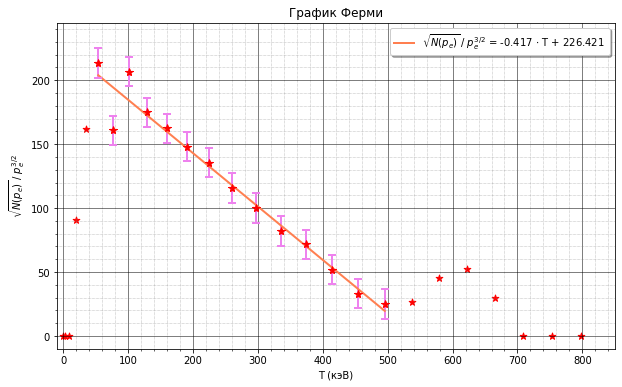

In [7]:
def approx(x, a, b):
    return a * x + b
beta_opt1, beta_cov1 = curve_fit(approx, Tcut, mkFermicut)
a = beta_opt1[0]
b = beta_opt1[1]


print('a = ', a)
print('b = ', b)



#получим погрешности для коэффициентов
sigma_a = np.sqrt(beta_cov1[0,0])
sigma_b = np.sqrt(beta_cov1[1,1])


print('sigma_a = ', sigma_a)
print('sigma_b = ', sigma_b)


residuals1 = mkFermicut - approx(Tcut,*beta_opt1)
fres1 = sum(residuals1**2)
S_e = np.sqrt(fres1/len(Tcut))
print('S_e = ', S_e)


print('Relative S_r a = % ', 100* sigma_a/abs(a))
print('Relative S_r b = % ', 100* sigma_b/abs(b))



# график
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(Tcut, approx(Tcut, *beta_opt1), 'coral', lw = 2)
ax.scatter(T, mkFermi, marker = '*', color = 'red', s = 50)
lgnd = ax.legend([r'$\sqrt{N(p_e)}\;/\;p_e^{3/2}$ = %.3f $\cdot$ T + %.3f ' %(a,b)], loc='upper right', shadow=True)

ax.set_title(r'График Ферми')
ax.set_ylabel(r'$\sqrt{N(p_e)}\;/\;p_e^{3/2}$')
ax.set_xlabel(r'T (кэВ)')

ax.grid(which='major',
color = 'k')

ax.minorticks_on()

ax.grid(which='minor',
color = 'gray',
linestyle = ':', linewidth = 0.5)

ax.grid(which='major', linewidth = 0.5)
plt.errorbar(Tcut, mkFermicut, fmt = 'ro', marker = '*', markersize = '8', yerr = S_e, capsize = 4, elinewidth = 2, capthick = 2, ecolor = 'violet')


plt.xlim (-10, 850)
plt.ylim (-10, 245)
plt.savefig('mkFermi.png', dpi=400, quality=100)
plt.show()

In [8]:
E_max = -b/a
E_max

542.4436584209516

In [16]:
E_error = np.sqrt((100* sigma_a/abs(a))**2 + (100* sigma_b/abs(b))**2)
print('%', E_error)
print(E_error/100 * E_max)

% 6.461660785065468
35.050869157261104


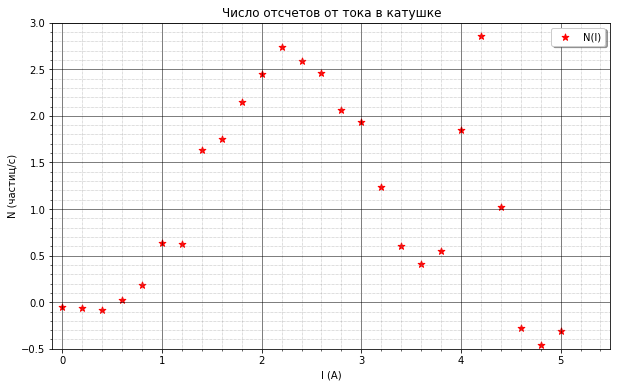

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))

# ax.plot(Tcut, approx(Tcut, *beta_opt1), 'coral', lw = 2)
ax.scatter(I, N, marker = '*', color = 'red', s = 50)
lgnd = ax.legend([r'N(I)'], loc='upper right', shadow=True)

ax.set_title(r'Число отсчетов от тока в катушке')
ax.set_ylabel(r'N (частиц/с)')
ax.set_xlabel(r'I (А)')

ax.grid(which='major',
color = 'k')

ax.minorticks_on()

ax.grid(which='minor',
color = 'gray',
linestyle = ':', linewidth = 0.5)

ax.grid(which='major', linewidth = 0.5)

plt.xlim (-0.1, 5.5)
plt.ylim (-0.5, 3)
plt.savefig('N(I).png', dpi=400, quality=100)
plt.show()

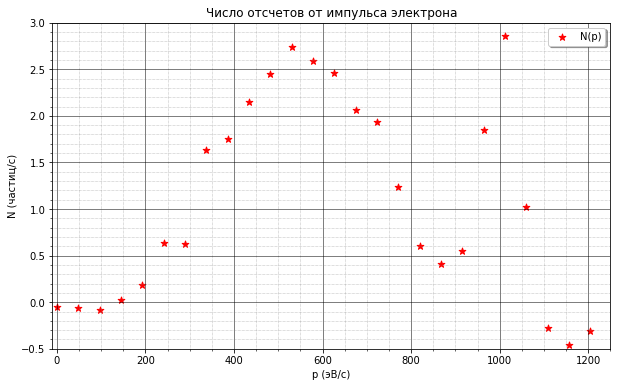

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))

# ax.plot(Tcut, approx(Tcut, *beta_opt1), 'coral', lw = 2)
ax.scatter(p, N, marker = '*', color = 'red', s = 50)
lgnd = ax.legend([r'N(p)'], loc='upper right', shadow=True)

ax.set_title(r'Число отсчетов от импульса электрона')
ax.set_ylabel(r'N (частиц/с)')
ax.set_xlabel(r'p (эВ/с)')

ax.grid(which='major',
color = 'k')

ax.minorticks_on()

ax.grid(which='minor',
color = 'gray',
linestyle = ':', linewidth = 0.5)

ax.grid(which='major', linewidth = 0.5)

plt.xlim (-10, 1250)
plt.ylim (-0.5, 3)
plt.savefig('N(p).png', dpi=400, quality=100)
plt.show()

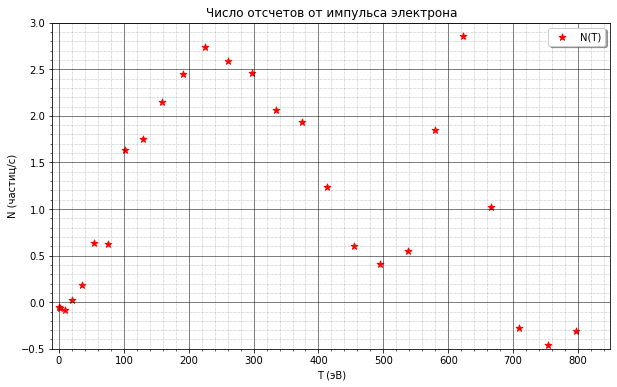

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))

# ax.plot(Tcut, approx(Tcut, *beta_opt1), 'coral', lw = 2)
ax.scatter(T, N, marker = '*', color = 'red', s = 50)
lgnd = ax.legend([r'N(T)'], loc='upper right', shadow=True)

ax.set_title(r'Число отсчетов от импульса электрона')
ax.set_ylabel(r'N (частиц/с)')
ax.set_xlabel(r'T (эВ)')

ax.grid(which='major',
color = 'k')

ax.minorticks_on()

ax.grid(which='minor',
color = 'gray',
linestyle = ':', linewidth = 0.5)

ax.grid(which='major', linewidth = 0.5)

plt.xlim (-10, 850)
plt.ylim (-0.5, 3)
plt.savefig('N(T).png', dpi=400, quality=100)
plt.show()

In [12]:
max(T)

797.3

In [13]:
min(T)

0.0